In [1]:
import os
import sys
if ".." not in sys.path:
    sys.path.insert(0, "..")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils_txt as tut
import utils_standard as sut

In [2]:
DATA_DIR = '../../datasets/NNN/'
dat = pd.read_pickle(os.path.join(DATA_DIR, ('face_roi_data.pkl')))
print(f'Unique face ROIs: {list(dat['roi'].unique())}')
ROI_LIST = dat['roi'].unique()

all_ks = {}
for _r in ['face', 'body', 'object']:
    subdir = os.path.join(DATA_DIR, f'{_r}_mins.pkl')
    df = pd.read_pickle(subdir)
    all_ks.update(df)

Unique face ROIs: ['Unknown_19_F', 'MF1_9_F', 'MF1_8_F', 'AF3_18_F', 'MF1_7_F', 'Unknown_5_F', 'AMC3_28_F']


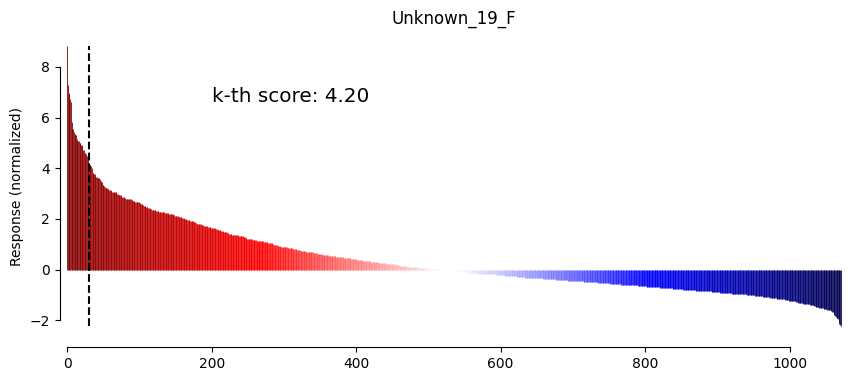

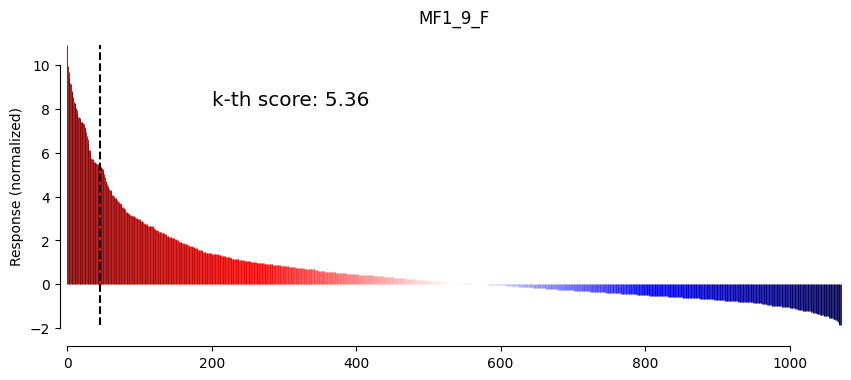

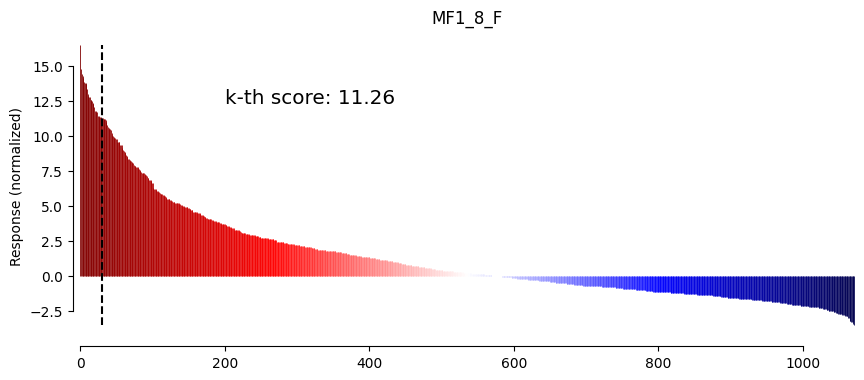

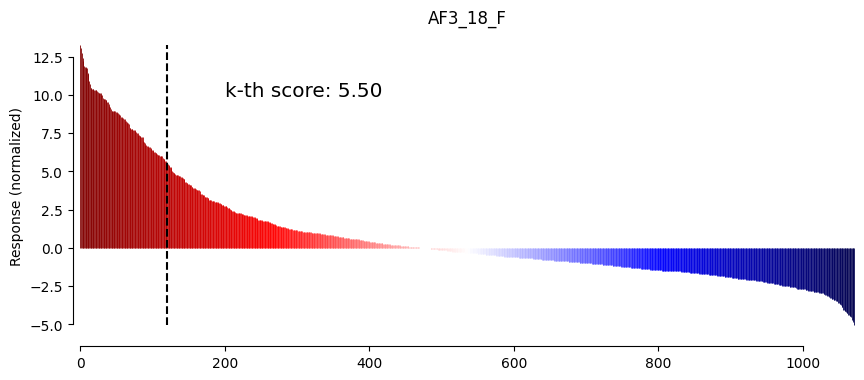

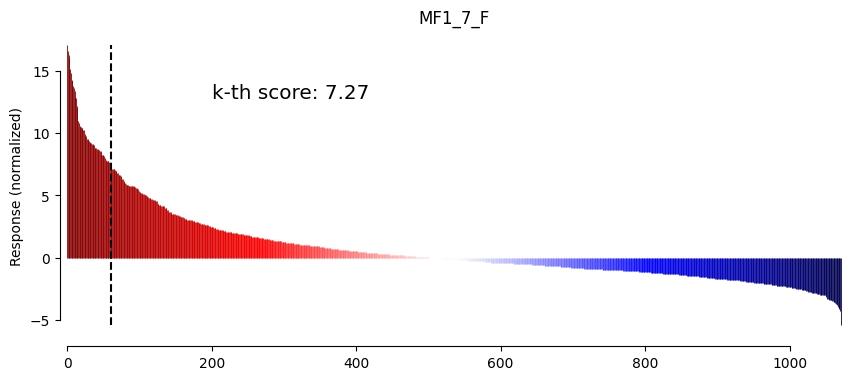

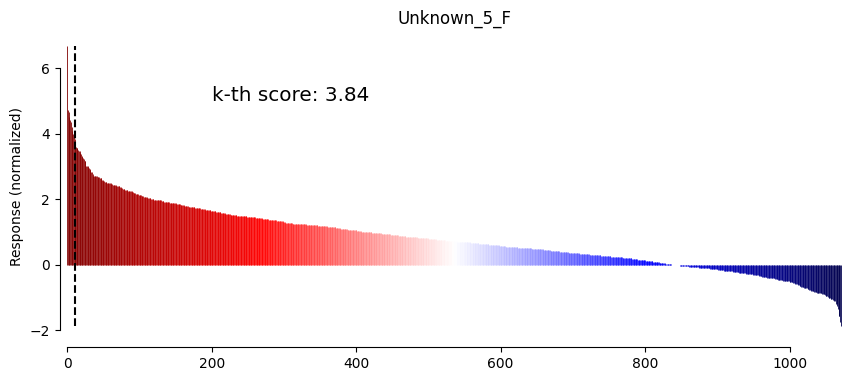

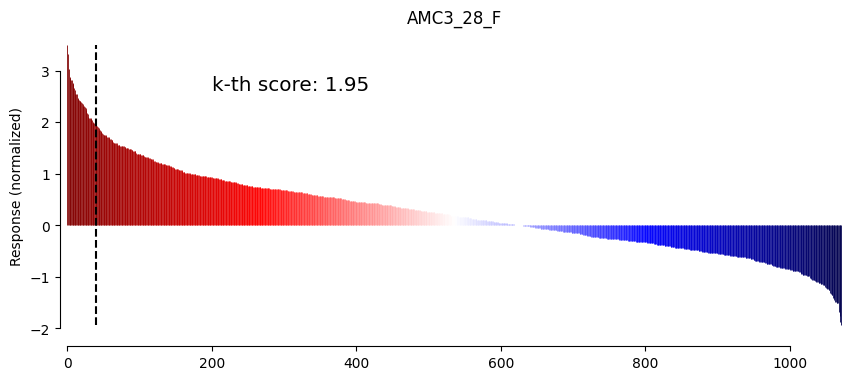

In [3]:
for _roi in ROI_LIST:
    scores = tut.landscape(dat, _roi)
    order = np.argsort(scores)[::-1]

    customp = sns.color_palette('seismic_r', len(scores))
    rxlim = len(scores)
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 4))
    # vertical sticks from 0 to score
    ax.vlines(range(len(scores)), 0, scores[order], 
              colors=customp, linewidth=0.6)

    ax.vlines(all_ks[_roi][0], scores.min(), scores.max(), 
              color='black', linestyle='--')

    kth_score = scores[order][all_ks[_roi][0]]
    ax.text(x=200, y=scores.max()*0.75, 
            s=f'k-th score: {kth_score:.02f}', size='x-large')
    # ax.hlines(kth_score, -5, len(scores),
    #           color='black', linestyle='-', linewidth=0.5)

    ax.set_xlim(left=-1, right=rxlim)
    ax.set_xlabel('')
    ax.set_ylabel('Response (normalized)')
    ax.set_title(_roi)

    sns.despine(trim=True, offset=5, fig=fig)
    plt.show()

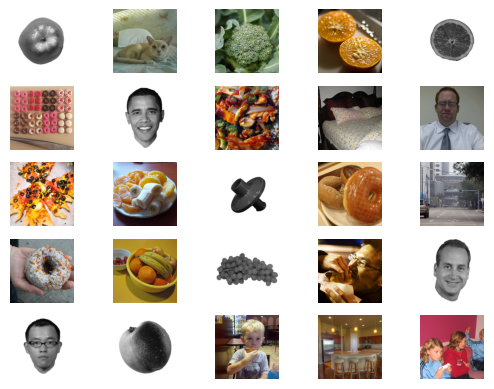

In [4]:
fig, axes = plt.subplots(5,5)
axes = axes.ravel()
for i in range(25):
    idx = order[i]
    ax = axes[i]
    sut.load_image(idx, ax)
plt.show()

In [ ]:
### OPTIONAL SECOND GRAPH